In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving prima-indians-diabetes.csv to prima-indians-diabetes.csv


In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['prima-indians-diabetes.csv']),header=None, names=col_names)

In [5]:
df.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
from sklearn.model_selection import train_test_split
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
Y = df.label # Target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [7]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
print(df["label"].value_counts())

0    500
1    268
Name: label, dtype: int64


In [53]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
accuracy_log = round(accuracy_score(Y_test,Y_pred)*100,2)
acc_logi = round(model.score(X_train,Y_train)*100,2)
print('score of logistic: %.3f' %acc_logi)
print('accuracy_score of logistic: %.3f' %accuracy_log)

score of logistic: 76.220
accuracy_score of logistic: 83.330


In [54]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
Y_pred=forest.predict(X_test)
accuracy_forest = round(accuracy_score(Y_test,Y_pred)*100,2)
acc_rf = round(forest.score(X_train,Y_train)*100,2)
print('score of random forest: %.3f' %acc_rf)
print('accuracy_score of random forest: %.3f' %accuracy_forest)

score of random forest: 100.000
accuracy_score of random forest: 78.120


In [55]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train, Y_train)
Y_pred=KNN.predict(X_test)
accuracy_KNN = round(accuracy_score(Y_test,Y_pred)*100,2)
acc_knn = round(KNN.score(X_train,Y_train)*100,2)
print('score of KNN: %.3f' %acc_knn)
print('accuracy_score of KNN: %.3f' %accuracy_KNN)

score of KNN: 77.780
accuracy_score of KNN: 76.040


In [56]:
#Naive Bayesian
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred=nb.predict(X_test)
accuracy_NB = round(accuracy_score(Y_test,Y_pred)*100,2)
acc_nb = round(nb.score(X_train,Y_train)*100,2)
print('score of Naive Bayesian: %.3f' %acc_nb)
print('accuracy_score of Naive Bayesian: %.3f' %accuracy_NB)

score of Naive Bayesian: 76.220
accuracy_score of Naive Bayesian: 78.650


In [57]:
#desicion tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred=tree.predict(X_test)
accuracy_DT = round(accuracy_score(Y_test,Y_pred)*100,2)
acc_dt = round(tree.score(X_train,Y_train)*100,2)
print('score of desicion tree: %.3f' %acc_dt)
print('accuracy_score of desicion tree: %.3f' %accuracy_DT)

score of desicion tree: 100.000
accuracy_score of desicion tree: 70.310


In [58]:
#SVM
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

svm = DecisionTreeClassifier()
svm.fit(X_train, Y_train)
Y_pred=svm.predict(X_test)
accuracy_SVM = round(accuracy_score(Y_test,Y_pred)*100,2)
acc_svm = round(svm.score(X_train,Y_train)*100,2)
print('score of SVM: %.3f' %acc_svm)
print('accuracy_score of SVM: %.3f' %accuracy_SVM)

score of SVM: 100.000
accuracy_score of SVM: 70.830


In [64]:
results = pd.DataFrame({'Model':['Logistic Regression','Random Forest','KNN',
                                'Naive Bayesian','Decision Tree','SVM'],
                         'Score':[acc_logi,acc_rf,acc_knn,acc_nb,acc_dt,acc_svm],
                         'Accuracy_score':[accuracy_log,accuracy_forest,accuracy_KNN,
                                           accuracy_NB,accuracy_DT,accuracy_SVM]})
result_df = results.sort_values(by='Accuracy_score', ascending = False)
result_df = result_df.reset_index(drop = True)
result_df.head(9)

,Model,Score,Accuracy_score
0,Logistic Regression,76.22,83.33
1,Naive Bayesian,76.22,78.65
2,Random Forest,100.00,78.12
3,KNN,77.78,76.04
4,SVM,100.00,70.83
5,Decision Tree,100.00,70.31


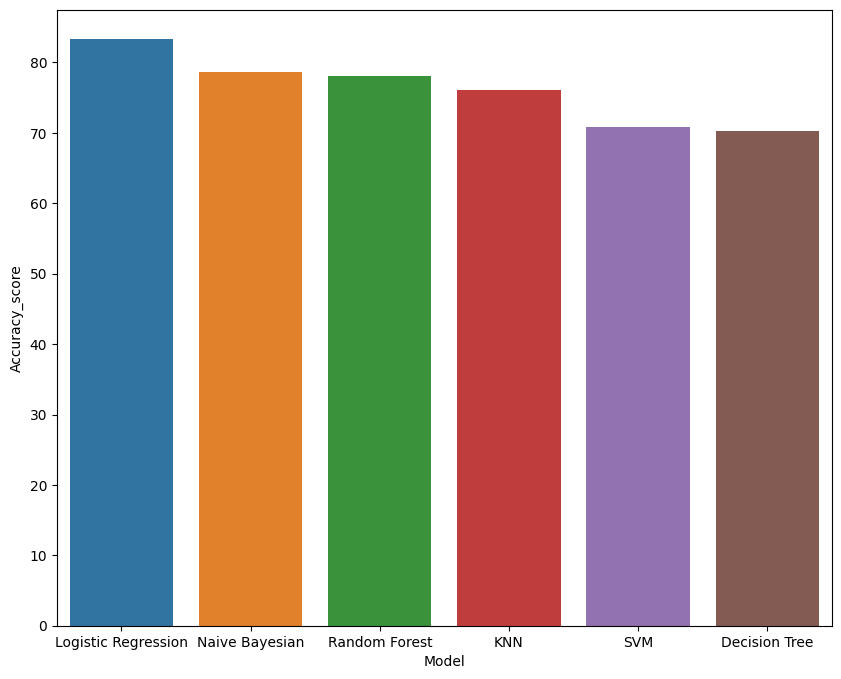

In [68]:
plt.subplots(figsize=(10,8))
ax=sns.barplot(x='Model',y='Accuracy_score',data=result_df)
labels = (result_df['Accuracy_score'])